In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [11]:
#df=df.drop_duplicates()
df.duplicated().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [14]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [22]:
print("Categories in gender variable:", end='')
print(df['gender'].unique())

print("Categories in race_ethnicity variable:", end='')
print(df['race_ethnicity'].unique())

print("Categories in parental level of education variable:", end='')
print(df['parental_level_of_education'].unique())

print("Categories in lunch variable:", end='')
print(df['lunch'].unique())

print("Categories in test_preparation_course variable:", end='')
print(df['test_preparation_course'].unique())


Categories in gender variable:['female' 'male']
Categories in race_ethnicity variable:['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education variable:["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable:['standard' 'free/reduced']
Categories in test_preparation_course variable:['none' 'completed']


In [24]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']
print('Number of numerical variables:', len(numeric_features) , numeric_features)
print('Number of categorical variables:', len(categorical_features), categorical_features)


Number of numerical variables: 3 ['math_score', 'reading_score', 'writing_score']
Number of categorical variables: 5 ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Feature Engineering
Adding columns for "Total Score" and "Average"

In [25]:
df['Total Score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average'] = df['Total Score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [28]:
full_reading = df[df['reading_score']==100].count()[0]
writing_full = df[df['writing_score']==100].count()[0]
math_full = df[df['math_score']==100].count()[0]
print("Number of students with full score in reading: ", full_reading)
print("Number of students with full score in writing: ", writing_full)
print("Number of students with full score in math: ", math_full)

Number of students with full score in reading:  17
Number of students with full score in writing:  14
Number of students with full score in math:  7


### EDA


<Axes: xlabel='Average', ylabel='Count'>

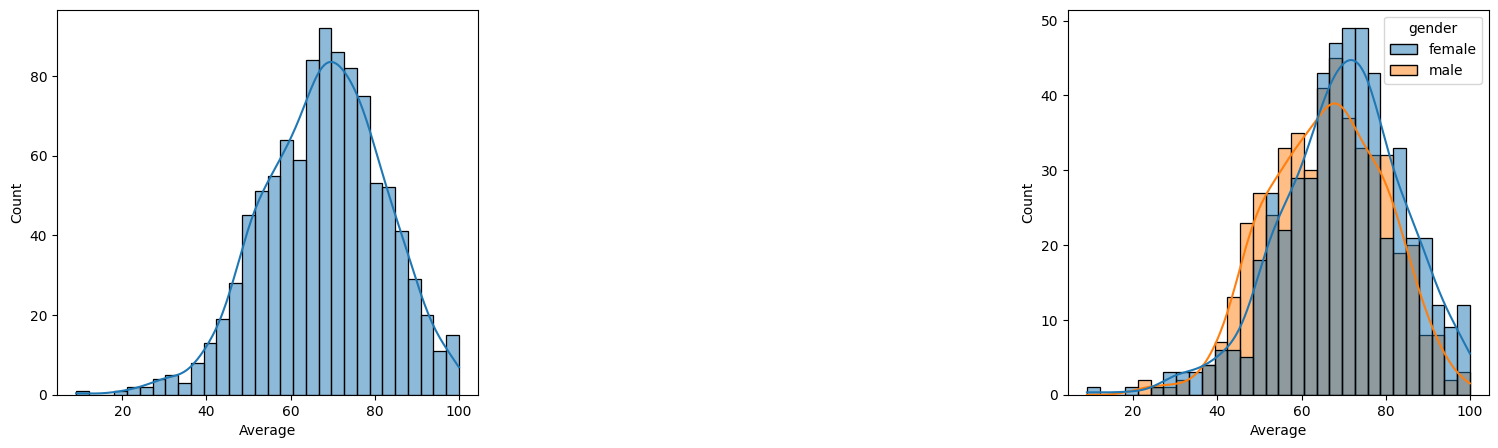

In [36]:
plt.subplots(1,3,figsize=(25,5))
plt.subplot(141)
sns.histplot(data=df,x='Average',bins=30,kde=True)
plt.subplot(143)
sns.histplot(data=df,x='Average',bins=30,kde=True,hue='gender')

### MultiVariate Analysis using pieplot

Text(0.5, 1.0, 'Gender')

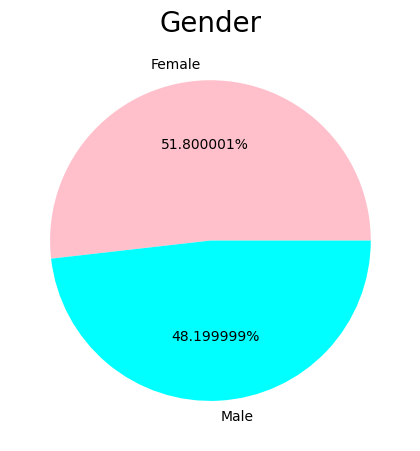

In [46]:
plt.rcParams['figure.figsize'] = (30,6)

plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels= 'Female', 'Male'
color= ['pink','cyan']

plt.pie(size, colors= color, labels= labels, autopct= '%2f%%')
plt.title('Gender',fontsize=20)

Text(0.5, 1.0, 'Race_Ethnicity')

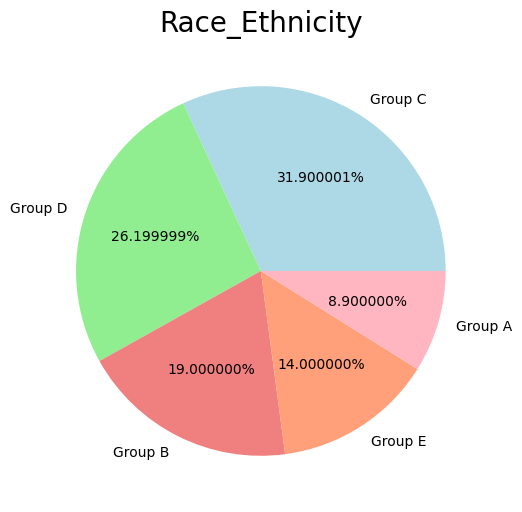

In [47]:
size=df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color= ['lightblue','lightgreen','lightcoral','lightsalmon','lightpink']    

plt.pie(size, colors= color, labels= labels, autopct= '%2f%%')
plt.title('Race_Ethnicity',fontsize=20)


### Univariate Analysis

([<matplotlib.patches.Wedge at 0x1bdf75ef100>,
 [Text(-0.06217041096298424, 1.0982417038160106, 'Male'),
  Text(0.06782226650507357, -1.1980818587083752, 'Female')],
 [Text(-0.033911133252536856, 0.5990409293541875, '51.8%'),
  Text(0.03956298879462625, -0.698881084246552, '48.2%')])

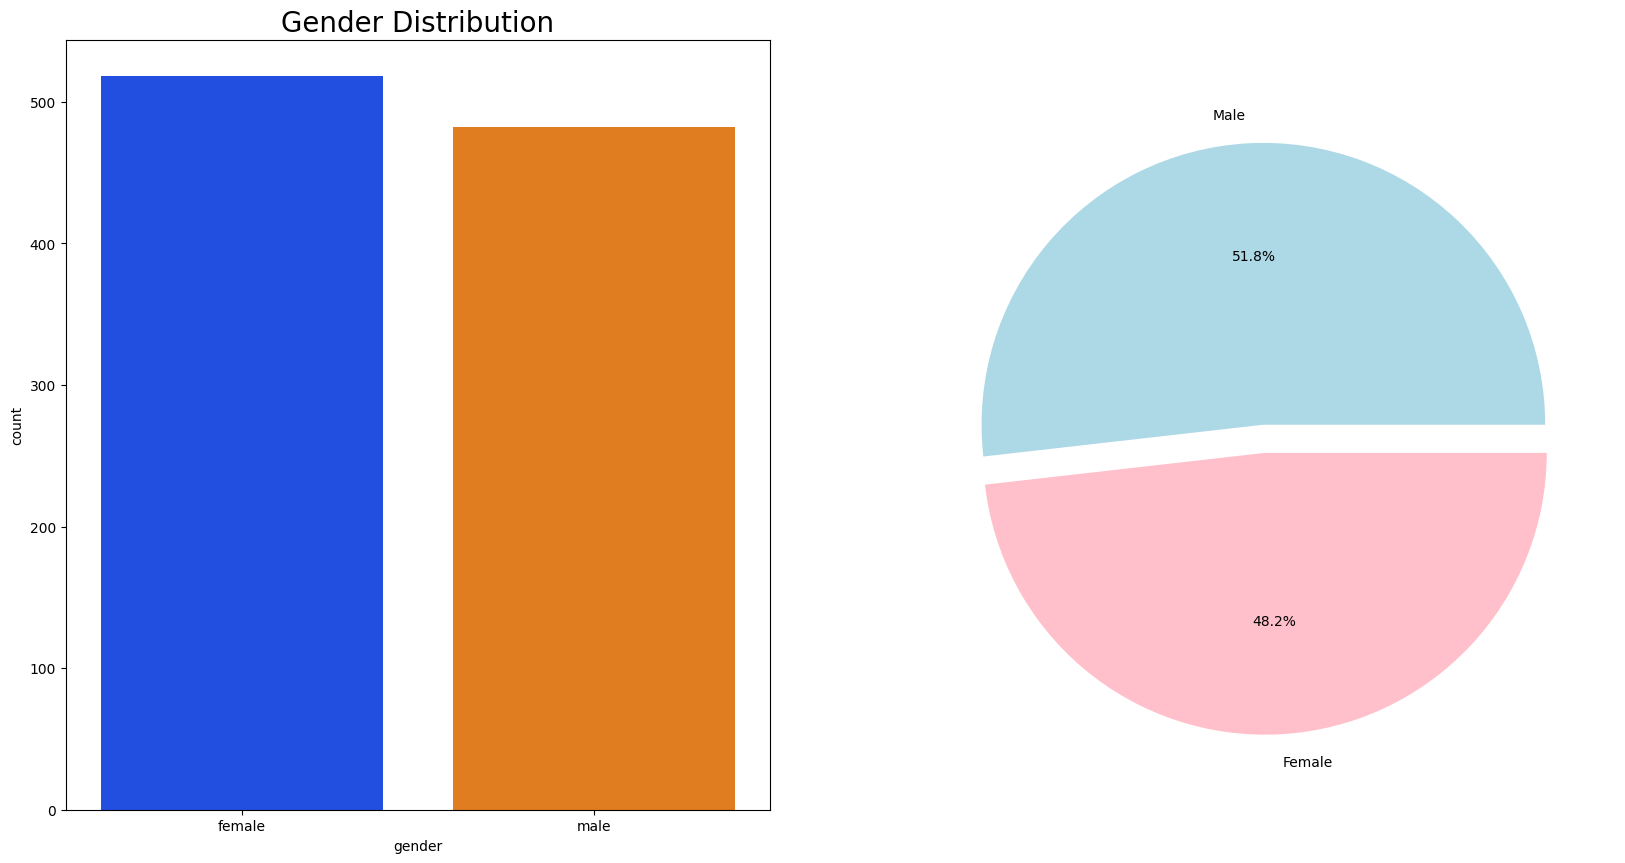

In [ ]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0])
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',colors=['lightblue','pink'])


### OutLiers

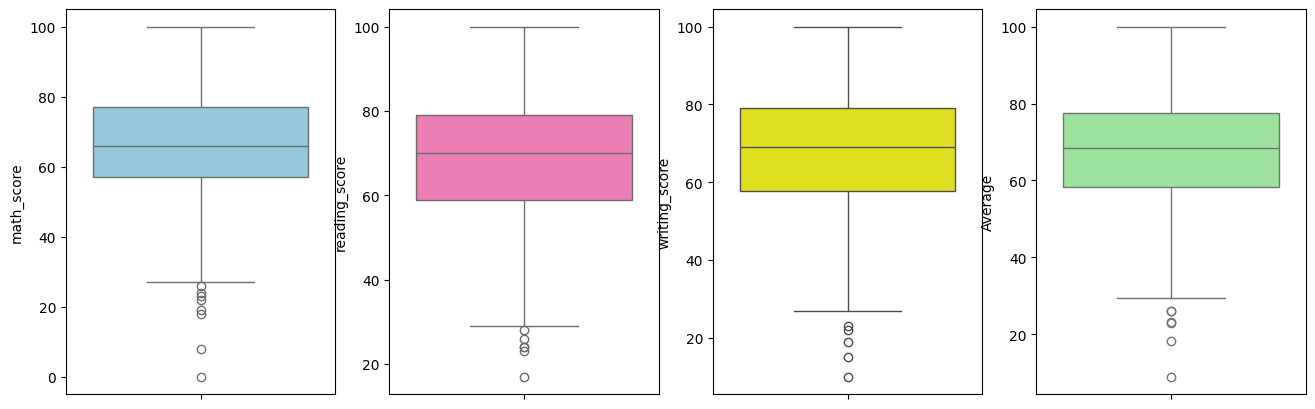

In [69]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')
plt.show()

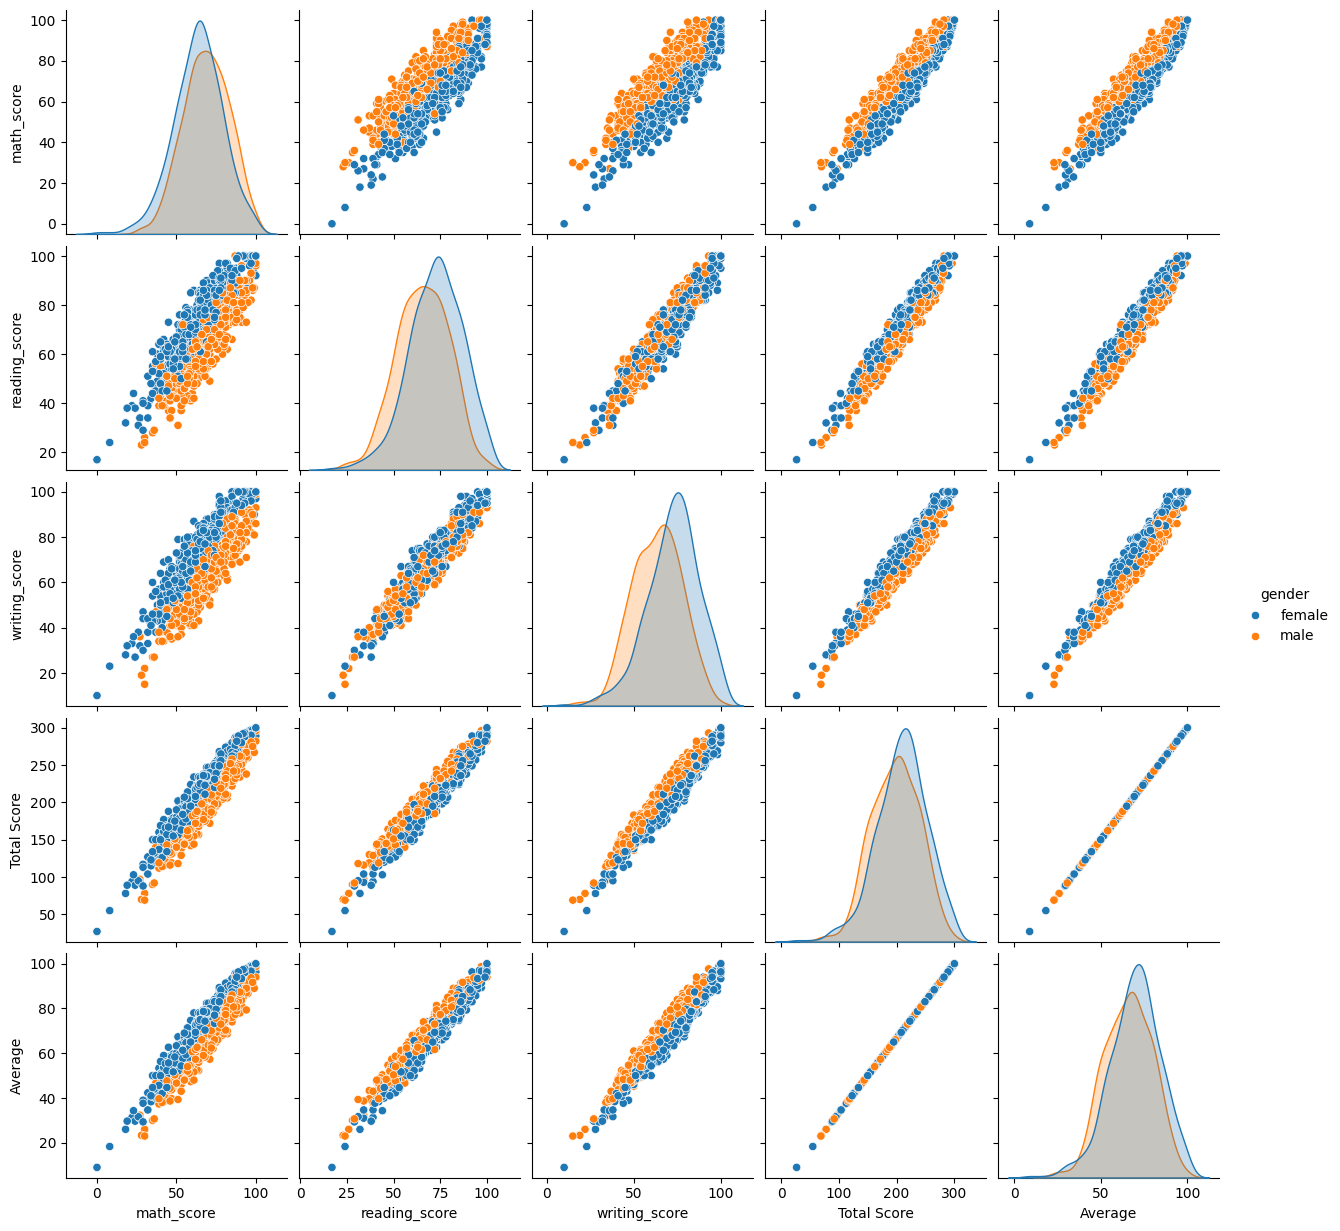

In [70]:
sns.pairplot(df,hue = 'gender')
plt.show()

###  Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.